In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#9370da']
colors_light = ['#fecfcf','#8ec7fe','#c8b7ec']

In [27]:
!head ../processed_data/wall_times_L12N12_U3.3.dat

# Wall times to collect 1 million samples for a 1D Bose-Hubbard lattice of size L=N=12 at U/t=3.3 & beta=16 in pigsfli
# Uniform sampling (seconds)     Truncated Exponential sampling (seconds)
5723.7     5747.37
5660.19    5760.47
5740.56    5848.61
5615.88    5832.48
5755.12    5671.14
5718.25    5867.44 
5816.29    5809.58
5824.39    5861.17


In [28]:
wall_time_uniform = np.loadtxt("../processed_data/wall_times_L12N12_U3.3.dat")[:,0]
wall_time_truncated = np.loadtxt("../processed_data/wall_times_L12N12_U3.3.dat")[:,1]

In [29]:
num_samples = wall_time_uniform.shape[0]

In [30]:
wall_time_uniform_err = np.std(wall_time_uniform)/np.sqrt(num_samples)
wall_time_truncated_err = np.std(wall_time_truncated)/np.sqrt(num_samples)

In [31]:
A = wall_time_truncated
σ_A = wall_time_truncated_err

B = wall_time_uniform
σ_B = wall_time_uniform_err

f = np.abs(A/B)

f_mean = np.mean(f)
σ_f = np.std(f)/np.sqrt(num_samples)

In [32]:
print("t_uni / t_trunc = %.2f +/- %.2f"%(f_mean,σ_f))

t_uni / t_trunc = 1.02 +/- 0.01


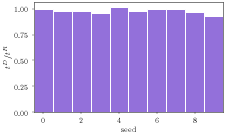

In [37]:
with plt.style.context('../IOP_large.mplstyle'):

    fig, ax = plt.subplots(constrained_layout=True)

    x = np.array(range(num_samples))
    width = 1.0 # the width of the bars

    ax.bar(x,wall_time_uniform/wall_time_truncated, width, edgecolor='w', fc=colors[2])
    # ax.bar(x + width/2,wall_time_truncated, width, label=r"$\rm{Direct}$")

    # ax.legend(frameon=True,loc=(0.62,0.04))
    
    ax.set_ylabel(r"$t^{D}/t^{R}$")
    ax.set_xlabel(r"$\rm{seed}$")
    ax.set_xlim(-0.5,9.5)
    
    plt.savefig("../figures/wall_times.pdf",dpi=300)